<a href="https://colab.research.google.com/github/indrianiim/Optik/blob/main/TUBES_SKO_Agnesia_Indryany_Mangopo_1101184101_TT42_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agnesia Indryany Mangopo

1101184101

TT-42-02

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.8
SM = 6  
M = -0.23
q = 1.6*10**-19
id = 90*10**-9 
B = 9*10**9 
F = 1 
K = 1.38*10**-23
T = 290 
RL = 50

#Parameter Pr
#Jarak Sentral ke ONU = 20 km
#Jarak ONU ke Roset = <500 m --> 5*19 = 95 m 
#Jarak Total = 20000 + 95 = 20095 m

d = np.arange(0.95,20.096,1) #Jarak (km)
L_Fiber = 0.28 #Berdasarkan jenis G652D (dB)  
N_Splicer = 4 #Jumlah Splicer
L_Splicer = 0.2 #Loss dari splicer (db)
N_Connector = 2 #Jumlah Konektor
L_Connector = 0.3 #Loss dari konektor (dB)
L_Splitter = 16 + 17.5 
Pt = 4 #Daya tx (dBm)

In [3]:
#Rumus Pr
def P_DayaTerima():
  hambatan_fiber = d * L_Fiber
  hambatan_splicer = N_Splicer * L_Splicer
  hambatan_connector = N_Connector * L_Connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_Splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_DayaTerima()
print('Daya Terima = ', Pr)

Daya Terima =  [-37.166 -37.446 -37.726 -38.006 -38.286 -38.566 -38.846 -39.126 -39.406
 -39.686 -39.966 -40.246 -40.526 -40.806 -41.086 -41.366 -41.646 -41.926
 -42.206 -42.486]


In [4]:
#Arus Primer
def Arus_Primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = Arus_Primer()
print("Arus Primer = ", ip)

Arus Primer =  [1.53634937e-04 1.44042280e-04 1.35048569e-04 1.26616407e-04
 1.18710733e-04 1.11298673e-04 1.04349407e-04 9.78340398e-05
 9.17254787e-05 8.59983239e-05 8.06287612e-05 7.55944631e-05
 7.08744966e-05 6.64492352e-05 6.23002783e-05 5.84103740e-05
 5.47633475e-05 5.13440340e-05 4.81382155e-05 4.51325620e-05]


In [5]:
#Signal Power
def Signal_Power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = Signal_Power()
print('Signal Power = ', Is_kuadrat)

Signal Power =  [1.24863541e-09 1.09757864e-09 9.64796337e-10 8.48077705e-10
 7.45479398e-10 6.55293177e-10 5.76017458e-10 5.06332315e-10
 4.45077506e-10 3.91233150e-10 3.43902748e-10 3.02298259e-10
 2.65726976e-10 2.33579996e-10 2.05322076e-10 1.80482728e-10
 1.58648382e-10 1.39455500e-10 1.22584524e-10 1.07754557e-10]


In [6]:
#Rumus SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*T*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[26.33310395 25.77528947 25.21733953 24.65926247 24.10106612 23.54275784
 22.98434452 22.42583266 21.86722835 21.30853731 20.74976489 20.19091614
 19.63199579 19.07300826 18.51395774 17.95484812 17.39568308 16.83646604
 16.27720025 15.71788873]


In [7]:
#Rumus Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[10.3663341   9.7215268   9.11668566  8.54935061  8.01721094  7.5180965
  7.04996937  6.61091598  6.19913968  5.81295378  5.45077492  5.11111687
  4.79258466  4.4938691   4.21374152  3.95104895  3.70470949  3.47370798
  3.25709193  3.05396771]


In [8]:
#Rumus BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.20193496e-22 7.32242394e-20 2.04625786e-17 2.88023626e-15
 2.21732100e-13 1.00380724e-11 2.84846042e-10 5.35923666e-09
 7.02421465e-08 6.69865800e-07 4.82945331e-06 2.72242800e-05
 1.23604268e-04 4.63929874e-04 1.47290405e-03 4.03610857e-03
 9.71685928e-03 2.08758471e-02 4.05771312e-02 7.22242644e-02]


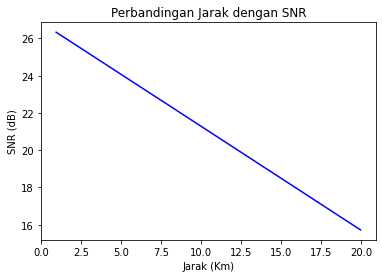

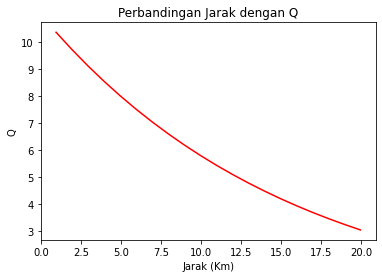

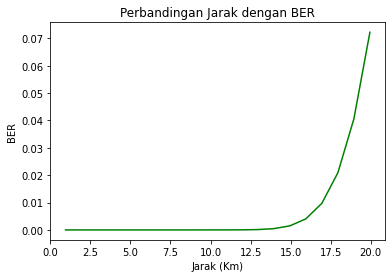

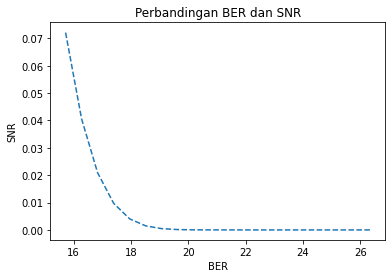

In [9]:
#GRAFIK
def Grafik_SNR():
  plt.figure()
  plt.plot(d,SNR,'b')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def Grafik_Q():
  plt.figure()
  plt.plot(d,Q,'r')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def Grafik_BER():
  plt.figure()
  plt.plot(d,BER,'g')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def Grafik_Perbandingan_BER_SNR():
    plt.figure()
    plt.plot(SNR,BER,'--')
    plt.title('Perbandingan BER dan SNR')
    plt.xlabel('BER')
    plt.ylabel('SNR')
    plt.show()

Grafik_SNR()
Grafik_Q()
Grafik_BER()
Grafik_Perbandingan_BER_SNR()